hi
hi


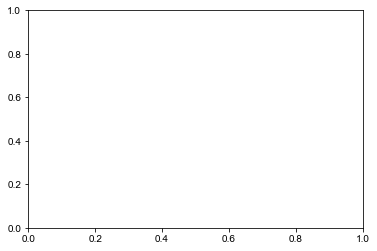

In [1]:
import os
from pathlib import Path
import sys

import pandas as pd
import numpy as np   # numerical library
import subprocess

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import subprocess
import multiprocessing as mp
import ast
print("hi")

sys.path.insert(0, '/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate')
from tax_pkg import taxid
# from tax_pkg import accession2taxid
import pandas as pd
import multiprocessing as mp
import sys
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager

from pathlib import Path

import matplotlib as mpl

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

fpath = Path(mpl.get_data_path(), "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")

from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
plt.rcParams['figure.dpi'] = 300
font_path = "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf"
font_manager.fontManager.addfont("/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

dfc=pd.read_csv("cluster_info.tsv",sep="\t")
genes=list(dfc["representative_seq"])
print("hi")


#load csv with manual annotations of  origin for confirmed hgt and metazoan intervals from chimeras
metadf=pd.read_csv("meta_origin_final.csv",index_col=0)
metas=metadf.index
hgtdf=pd.read_csv("hgt_origin_final.csv",index_col=0)
hgtdf["gene"]=[x.split(";")[1] for x in hgtdf.index]
gene_genome={x.split(";")[1]:x.split(";")[0] for x in hgtdf.index}
gene_organism={x:y for x,y in zip(hgtdf.gene,hgtdf.organism)}
hgts=hgtdf.index
#final set of chimeric hgt genes (both confirmed HGT and metazoan intervals)
metas_2=[x for x in metas if x.split(";")[1] in genes]
hgts_2=[x for x in hgts if x.split(";")[1] in genes]

import pickle
file_path = 'chimera_intervals.pickle'
with open(file_path, 'rb') as file:
    chimera_intervals=pickle.load(file)
ch_gene_intervals={}
meta_gene_intervals={}
results2={}
for x in genes:
    ch_gene_intervals[x]=[xi for xi in hgts_2 if x in xi]
    meta_gene_intervals[x]=[xi for xi in metas_2 if x in xi]
    resultsa={}
    for xi in ch_gene_intervals[x]:
        resultsa[ast.literal_eval(xi.split("_")[-1])]="HGT"
    for xi in meta_gene_intervals[x]:
        resultsa[ast.literal_eval(xi.split("_")[-1])]="Meta"
    results2[x]=resultsa
direct="/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate"
def get_color(ann):
    if "Viruses" in ann:
        return "yellow"
    if "Bacteria" in ann:
        return "blue"
    if "Fungi" in ann:
        return "brown"
    elif "Viridiplantae" in ann:
        return "green"
    elif "Arthropoda" in ann: 
        return "pink"
    elif "Metazoa" in ann:
        return "orange"
    else:
        return "black"
def get_taxid(ti):
    try:
        l=taxid.get_lineage(ti,{})
        sk=taxid.get_superkingdom(ti,l)
        k=taxid.get_kingdom(ti,l)
        p=taxid.get_phylum(ti,l)
        o=taxid.get_order(ti,l)
        c=get_color(str(l))
    except:
        ti="nan"
        return ("nan","nan","nan","nan","nan","nan")

    return (ti,sk,k,p,o,c)
lenmap={'XP_046664087.1': 585, 'XP_027204138.1': 987, 'XP_023346081.1': 261, 'XP_028168683.1': 471, 'XP_034487048.1': 586, 'XP_022243968.1': 1054, 'XP_046403459.1': 196, 'XP_046456339.1': 2163, 'XP_050528041.1': 793, 'XP_049785902.1': 564, 'XP_015833841.1': 1239, 'XP_031842795.1': 263, 'XP_033212818.1': 1241, 'XP_012275032.1': 1065, 'XP_037049533.1': 392, 'XP_037041958.1': 1320, 'XP_029821973.3': 979, 'XP_049849891.1': 642, 'XP_015786976.1': 1300, 'XP_026676798.1': 1946, 'XP_045595407.1': 576, 'XP_035711638.1': 1389, 'XP_021960153.2': 387, 'XP_035708240.1': 1023, 'XP_046646423.1': 1644, 'XP_026477151.1': 1735, 'XP_037026007.1': 395, 'XP_027199942.1': 708, 'XP_045779580.1': 706, 'XP_015834127.1': 551, 'XP_042220148.1': 591, 'XP_052563446.1': 475, 'XP_047736274.1': 709, 'XP_046453153.1': 869, 'XP_048512468.1': 1192, 'XP_046649021.1': 652, 'XP_036230923.1': 904, 'XP_035716531.1': 1078, 'XP_023329593.1': 646, 'XP_026318555.1': 524, 'XP_034233350.1': 315, 'XP_031340986.1': 881, 'XP_037790819.1': 1170, 'XP_035715441.1': 526, 'XP_049511280.1': 842, 'XP_002428156.1': 2081, 'XP_034827763.1': 1302, 'XP_035708168.1': 394, 'XP_037943392.1': 2323, 'XP_049849988.1': 834, 'XP_044731417.1': 881, 'XP_021958683.2': 294, 'XP_023332299.1': 400, 'XP_023318028.1': 1215, 'XP_045614234.1': 611, 'XP_046594669.1': 885, 'XP_040568466.1': 401, 'XP_040073766.1': 504, 'XP_051173821.1': 1137, 'XP_023328891.1': 391, 'XP_022178340.1': 1662, 'XP_046402901.1': 1335, 'XP_044763649.1': 774, 'XP_046439036.1': 824, 'XP_029662819.1': 340, 'XP_037030969.1': 299, 'XP_018903502.1': 866, 'XP_022173178.1': 973, 'XP_049881687.1': 432, 'XP_040564143.1': 931, 'XP_041972388.1': 1036, 'XP_042908388.1': 404, 'XP_044009448.1': 594, 'XP_036141434.1': 1845, 'XP_049881676.1': 633, 'XP_023324156.1': 799, 'XP_025018608.1': 372, 'XP_015837071.1': 537, 'XP_023236565.1': 672, 'XP_034245505.1': 549, 'XP_021699539.1': 1181, 'XP_014216391.1': 549, 'XP_035715507.1': 249}


## Interval demarcation algorithm

In [ ]:
n="XP_037790819.1"

In [41]:
import pickle
import pandas as pd
import multiprocessing as mp
import numpy as np
import pickle
from Bio import SeqIO
import os
import subprocess
import sys
#written by RK with chatGPT


#load fasta w/ all queries 
# record_dict = SeqIO.to_dict(SeqIO.parse('scaffold_genomes/ncbi_dataset/data/combined_output.fa', 'fasta'))

def get_overlapping_rows(df, x, N=False):
    """
    Returns a new DataFrame with all rows from the input DataFrame that overlap with the given position x.
    """
    overlapping_rows = df[(df['qstart'] <= x) & (df['qend'] >= x)]
    if N:
        return overlapping_rows.shape[0]
    return overlapping_rows


def count_overlapping_seqs(df, start, end):
    """
    Input: a df with blast hits and start, end coordinates for the length of the query 
    Returns an array of positions and an array of the number of overlapping blast hits for each position
    """
    # Create an interval index from the qstart and qend columns
    intervals = pd.IntervalIndex.from_arrays(df['qstart'], df['qend'], closed='both')
    
    # Create a Boolean index of intervals that overlap with the start and end positions
    mask = intervals.overlaps(pd.Interval(start, end, closed='both'))
    
    # Use the Boolean index to select the overlapping intervals and count the number of occurrences
    counts = intervals[mask].value_counts(sort=False)
    
    # Create a Series of counts for each position between the start and end
    positions = np.arange(start, end)
    num_seqs = np.zeros_like(positions)
    for i, pos in enumerate(positions):
        for interval in counts.index:
            if pos in interval:
                num_seqs[i] += 1
    
    return positions, num_seqs

def max_y_x(x, y):
    """
    Returns the x value corresponding to the maximum y value in the given x and y arrays.
    """
    max_y_index = np.argmax(y)  # Find the index of the maximum y value
    return x[max_y_index]  # Return the x value at that index

def merge_intervals(d):
    """
    Merges intervals with overlap greater than 15% by replacing them with the interval with the greatest number of hits.
    Input:
    - d: a dictionary with keys (start, stop) and values number of hits
    Returns:
    - A new dictionary with merged intervals
    """
    merged_d = {}
    for (start1, stop1), num1 in d.items():
        # Compute length of current interval
        length1 = stop1 - start1 + 1
        
        # Check for overlaps with other intervals
        max_num = num1
        max_interval = (start1, stop1)
        for (start2, stop2), num2 in d.items():
            # Ignore the current interval
            if (start1, stop1) == (start2, stop2):
                continue
            
            # Compute length of other interval
            length2 = stop2 - start2 + 1
            
            # Compute overlap between the intervals
            overlap = max(0, min(stop1, stop2) - max(start1, start2) + 1)
            
            # Compute the fraction of overlap with respect to the length of the current interval
            overlap_frac = overlap / length1
            
            # If the overlap is greater than 15% and the number associated with the other interval is greater,
            # update the maximum number and interval
            if overlap_frac > 0.15 and num2 > max_num:
                max_num = num2
                max_interval = (start2, stop2)
        
        # Add the maximum interval to the merged dictionary
        merged_d[max_interval] = max_num
    
    return merged_d

def find_peak_interval(pos,cov,dfi,f):
    """
    Input: array of positions, array of blast hit density by position, dataframe with blast hits, 
    threshold density cutoff (float) for intervals 
    
    Runs interval demarcation algorithm modified from Bréhélin et al. PLOS Computational Biology, 2018
    https://doi.org/10.1371/journal.pcbi.1005889
    
    """
    #identify global maximum in blast hit density and all seqs overlapping with it
    peak=max_y_x(pos,cov)
    unstable=False
    C=get_overlapping_rows(dfi,peak)
    
    #set preliminary interval boundaries
    Ce=max(dfi.qend)
    Cs=min(dfi.qstart)
    
    #trim interval boundaries until both ends have at least f*max (peak) density
    N=C.shape[0]
    Ns=get_overlapping_rows(C, Cs, True)
    Ne=get_overlapping_rows(C, Ce, True)
    Cei=Ce
    Csi=Cs
    if Ns<f*N:
        Cs+=1
        unstable=True
    if Ne<f*N:
        Ce-=1
        unstable=True
    while unstable:
        Ns=get_overlapping_rows(C, Cs, True)
        Ne=get_overlapping_rows(C, Ce, True)

        if Ns>=f*N and Ne>=f*N:
            break
        else:
            if Ns<f*N:
                Cs+=1

            if Ne<f*N:
                Ce-=1
   
    return (Cei, Csi),(Cs, Ce),C


 

In [ ]:

#load dataframe, select top 30000 hits by evalue excluding arthropod hits

fig = plt.figure(dpi=300,figsize=[20,26])

ax1 = fig.add_subplot(5, 4, 1)
ax2 = fig.add_subplot(5, 4, 2)
ax3 = fig.add_subplot(5, 4, 3, sharey = ax2)
ax=[ax1,ax2,ax3]

add=[x for x in os.listdir('/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate/inter_blast_results') if n in x][0]
ints=results2[n]
df=pd.read_csv(f"{direct}/inter_blast_results/{add}",sep="\t", names="qseqid sseqid stitle staxids sscinames sphylums skingdoms pident length mismatch gapopen qstart qend sstart send evalue bitscore".split(" "), dtype={"staxids": str})
# df=df[~df.sphylums.astype(str).str.contains("Arthropoda")]
df=df[~df.sphylums.astype(str).str.contains("Rotifera")]
df=df.sort_values("evalue").iloc[0:int(2e4),:]
df=df[df.evalue<1e-50]

floor=1e-200

for index, row in df.iterrows():
    ax[0].hlines(np.log10(float(row["evalue"])+floor),float(row["qstart"]),float(row["qend"]),color='black',linewidth=1)


ax[0].set_xlabel("Position on query sequence",font=fpath,fontsize=12)
ax[0].set_ylabel("Log10(E-value+1e-200)",font=fpath,fontsize=12)
ax[0].set_title("Blast Round 1 Results",font=fpath,fontsize=14)

dfo=pd.read_csv(f"/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate/inter_blast_results/GCF_015228065.1;XP_037790819.1.tsv",sep="\t", names="qseqid sseqid stitle staxids sscinames sphylums skingdoms pident length mismatch gapopen qstart qend sstart send evalue bitscore".split(" "))
dfo=dfo[~dfo.sphylums.astype(str).str.contains("Arthropoda")]
df1=dfo.loc[:,["sseqid","qstart","qend","sstart","send"]]

df1=df1.iloc[0:30000,:]

#iteratively assign blast hits to intervals until <10 hits left
dfi=df1.copy()
intermd={}
interm={}
i=1
while i<=2:
    #obtain blast hit coverage for all positions in query 
    ret=count_overlapping_seqs(dfi,0,1170)
    interi,inter,df=find_peak_interval(ret[0],ret[1],dfi,.20)
    if interi!=None:
        dfi=dfi.drop(df.index)
        #saves interval and its number of overlapping hits if length of interval>35 residues and overlapping hits>10
        if inter[1]-inter[0]>35 and df.shape[0]>10:
            interm[inter]=df.shape[0]
            intermd[inter]=df
            ax[i].plot(ret[0],ret[1],color='black')
            ax[i].vlines(max_y_x(ret[0],ret[1]),0,1170,color='black')
            ax[i].set_xlabel("Position on query sequence",fontsize=12,)
            if i==1:
                ax[i].set_ylabel("Number of overlapping BLAST hits",fontsize=12)
            ax[i].fill_betweenx(np.linspace(0,1100,1000), inter[0], inter[1], color='grey', alpha=0.2, label='Shaded Region')
            ax[i].set_xticks([0, 250, 500, 750, 1000])
            ax[i].set_title(f"Interval demarcation iteration {i}",fontsize=14)
            ax[i].set_ylim(0,1100) 
        i+=1
plt.savefig(f"methods_figure_panel/combined_interval_demarcation.svg",format="svg", bbox_inches="tight")
plt.show()



## Blast-based ancestry inference

In [46]:
n="XP_037790819.1"

In [47]:

add=[x for x in os.listdir('/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate/inter_blast_results') if n in x][0]
df=pd.read_csv(f"{direct}/inter_blast_results/{add}",sep="\t", names="qseqid sseqid stitle staxids sscinames sphylums skingdoms pident length mismatch gapopen qstart qend sstart send evalue bitscore".split(" "), dtype={"staxids": str})
# df=df[~df.sphylums.astype(str).str.contains("Arthropoda")]
df=df[~df.sphylums.astype(str).str.contains("Rotifera")]
df=df.sort_values("evalue").iloc[0:int(2e4),:]
ints=results2[n]

In [53]:
def make_plotf(n):
    fig,ax=plt.subplots(1,2,dpi=300,figsize=(8,4),sharey=True)
  
    add=[x for x in os.listdir('/net/bos-nfsisilon/ifs/rc_labs/extavour_lab/rkapoor/home_migrate/inter_blast_results') if n in x][0]
    ints=results2[n]
    df=pd.read_csv(f"{direct}/inter_blast_results/{add}",sep="\t", names="qseqid sseqid stitle staxids sscinames sphylums skingdoms pident length mismatch gapopen qstart qend sstart send evalue bitscore".split(" "), dtype={"staxids": str})
    # df=df[~df.sphylums.astype(str).str.contains("Arthropoda")]
    df=df[~df.sphylums.astype(str).str.contains("Rotifera")]
    df=df.sort_values("evalue").iloc[0:int(2e4),:]
    df=df[df.evalue<1e-50]
    td=[]
    for x in df.staxids:
        if ";" in str(x):
            td.append(float(x.split(";")[0]))
        else:
            td.append(float(x))
    with mp.Pool(29) as p:
       
        hgts = p.map(get_taxid, td)
    df.loc[:,["taxid","superkingdom","kingdom","phylum","order","color"]]=hgts
    d=df[df.color.astype(str)!="nan"]
    d=d[d.color.astype(str)!="None"]
    d["color"]=d["color"].fillna("black")

    floor=1e-198

    for index, row in d.iterrows():
        ax[0].hlines(np.log10(float(row["evalue"])+floor),float(row["qstart"]),float(row["qend"]),color=row["color"],linewidth=1)
        if row.evalue<floor:
            ax[0].hlines(np.log10(float(row["evalue"])+floor),float(row["qstart"]),float(row["qend"]),linewidth=1, color='red')
        if row.sseqid==n:
            ax[0].hlines(-200,float(ax[0].get_xlim()[0]),float(ax[0].get_xlim()[1]),linewidth=1,color='fuchsia')
    mn=ax[0].get_ylim()[0]-.10*(ax[0].get_ylim()[1]-ax[0].get_ylim()[0])
    for y in ints:
        if ints[y]=="HGT":
            color="darkorchid"
        else:
            color="gold"
        ax[0].hlines(mn,y[0],y[1],color,linewidth=7.0)
    ax[0].set_xlim(-20,lenmap[n]+20)

    ax[0].set_xlabel("Position with respect to query (N-C)",font=fpath,fontsize=12)
    ax[0].set_ylabel("Log10(E-value+1e-200)",font=fpath,fontsize=12)
    ax[0].set_title("Blast Round 1 Results",font=fpath,fontsize=14)

    inters=[x for x in os.listdir("final_interval_sep_blasts_meta") if n in x]+[x for x in os.listdir("final_interval_sep_blasts_hgt") if n in x]
    for m in inters:
        if "Meta" in m:
            df=pd.read_csv(f"final_interval_sep_blasts_meta/{m}",sep="\t",dtype={"staxids": str})
        else:
            df=pd.read_csv(f"final_interval_sep_blasts_hgt/{m}",sep="\t",dtype={"staxids": str})
        df=df.sort_values("evalue").iloc[0:int(2e4),:]
        df=df[df.evalue<1e-50]
        df=df[~df.sphylums.astype(str).str.contains("Rotifera")]
        td=[]
        for x in df.staxids:
            if ";" in str(x):
                td.append(float(x.split(";")[0]))
            else:
                td.append(float(x))
        with mp.Pool(29) as p:

            hgts = p.map(get_taxid, td)
        df.loc[:,["taxid","superkingdom","kingdom","phylum","order","color"]]=hgts
        d=df[df.color.astype(str)!="nan"]
        d=d[d.color.astype(str)!="None"]
        d["color"]=d["color"].fillna("black")

        floor=1e-198
        start,stop=ast.literal_eval(m.split("_")[-1].split(".tsv")[0])
        xstart=max(start-10,0)
        for index, row in d.iterrows():
            ax[1].hlines(np.log10(float(row["evalue"])+floor),xstart+float(row["qstart"]),xstart+float(row["qend"]),color=row["color"],linewidth=1)
            if row.evalue<1e-190:
                ax[1].hlines(np.log10(float(row["evalue"])+floor),xstart+float(row["qstart"]),xstart+float(row["qend"]),linewidth=1, color='red')
            
            if row.sseqid==n:
                ax[1].hlines(-200,xstart+float(row["qstart"]),xstart+float(row["qend"]),linewidth=1,color='fuchsia')

    ints=results2[n]
    for y in ints:
        if ints[y]=="HGT":
            color="darkorchid"
        else:
            color="gold"
        ax[1].hlines(mn,y[0],y[1],color,linewidth=7.0)
    ax[1].set_xlim(-20,lenmap[n]+20)
 
    ax[1].set_xlabel("Position with respect to query (N-C)",fontsize=12)
    ax[1].set_title("Blast Round 2 Results",font=fpath, fontsize=14)
    ax[1].set_ylabel("Log10(E-value+1e-200)",font=fpath, fontsize=12)    #
    
#     legend_elements = [  Line2D([0], [0], color='blue', lw=4, label='Bacterial'),
#        Line2D([0], [0], color='orange', lw=4, label='Non-arthropod metazoan'),
#        Line2D([0], [0], color='pink', lw=4, label='Non-chimeric arthropod'),
#         Line2D([0], [0], color='fuchsia', lw=4, label='Query chimera (arthropod)'),
#         Line2D([0], [0], color='red', lw=4, label='Secondary chimera (arthropod)'),

#        ]

#     custom_font = FontProperties(fname="/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf", size=12)
#     plt.legend(handles=legend_elements, bbox_to_anchor=(1.04, 1), loc="upper left", prop=custom_font)
    
#     legend_elements = [  
#     Line2D([0], [0], color='goldenrod', lw=4, label='Putative Metazoan-ancestry interval')
#    ]

#     custom_font = FontProperties(fname="/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf", size=12)
#     plt.legend(handles=legend_elements, bbox_to_anchor=(1.04, 1), loc="upper left", prop=custom_font)
    plt.savefig(f"methods_figure_panel/{n}.svg",format="svg", bbox_inches="tight")


    plt.close(fig)

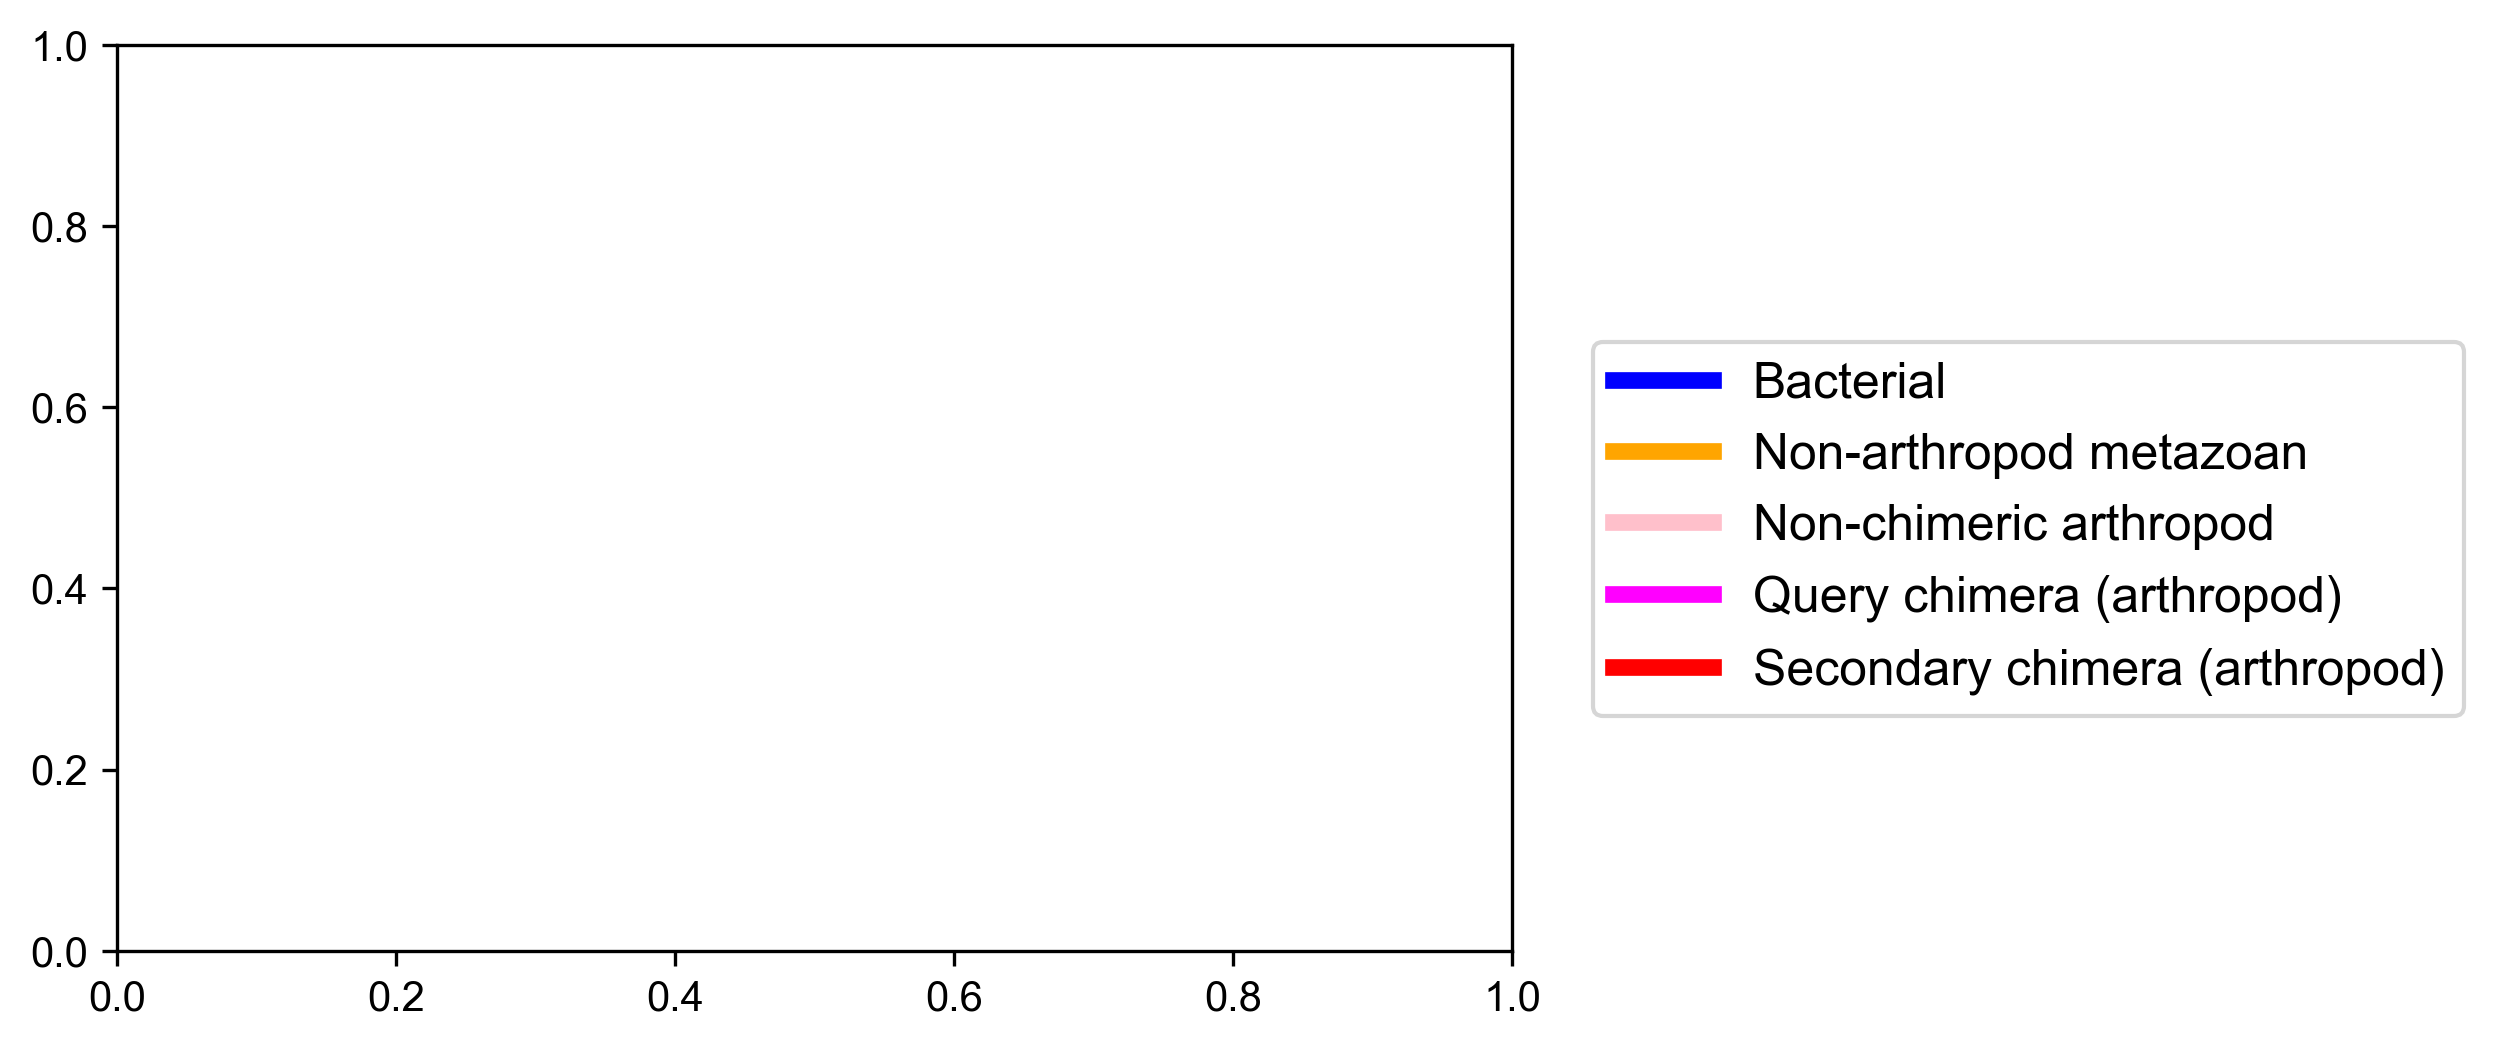

In [56]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

legend_elements_1 = [
    Line2D([0], [0], color='blue', lw=4, label='Bacterial'),
    Line2D([0], [0], color='orange', lw=4, label='Non-arthropod metazoan'),
    Line2D([0], [0], color='pink', lw=4, label='Non-chimeric arthropod'),
    Line2D([0], [0], color='fuchsia', lw=4, label='Query chimera (arthropod)'),
    Line2D([0], [0], color='red', lw=4, label='Secondary chimera (arthropod)'),
]

legend_elements_2 = [
    Line2D([0], [0], color='gold', lw=4, label='Putative Metazoan-ancestry interval'),
    Line2D([0], [0], color='darkorchid', lw=4, label='Putative HGT-ancestry interval')
]

custom_font = FontProperties(fname="/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf", size=12)

plt.legend(handles=legend_elements_2, bbox_to_anchor=(1.04, 0.5), loc="upper left", prop=custom_font)
plt.savefig("separated_legends1.svg",format="svg",bbox_inches="tight")

plt.legend(handles=legend_elements_1, bbox_to_anchor=(1.04, 0.7), loc="upper left", prop=custom_font)
plt.savefig("separated_legends2.svg",format="svg",bbox_inches="tight")

plt.show()


In [55]:
make_plotf("XP_037790819.1")